![Banner](../media/banner1.png)

---
# Workshop 1.3: <font color=peru>Basics of Data Analysis with Pandas</font>

* **Contributors**:
    * Jose Rodriguez (@Cyb3rPandah)
    * Ian Hellen (@ianhellen)
    * Pete Bryan (@Pete Bryan)
<br><br>
* **Agenda**:
    * Part 1
        * [Importing the Pandas Library](#import-pandas)
        * [DataFrame, an organized way to represent data](#dataframe)
            * Pandas Structures
            * Importing data
        * [Interacting with DataFrames](#interacting)
            * Selecting columns
            * Indexes
            * Accessing individual values
            * pandas I/O functions
        * [Selection and Filtering](#selecting)
    * Part 2
        * [Sorting and removing duplicates](#sorting)
        * [Grouping](#grouping)
        * [Adding and removing columns](#adding-columns)
        * [Simple joins](#simple-joins)
        * [Statistics 101](#stats-101)
<br><br>
* **Notebook**: [https://aka.ms/Jupyterthon-ws-1-3](https://aka.ms/Jupyterthon-ws-1-3)
* **License**: [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

* **Q&A** - OTR Discord **#Jupyterthon #WORKSHOP DAY 1 - BASICS OF DATA ANALYSIS**


---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="import-pandas">Importing the Pandas Library</a>

This entire section of the workshop is based on the **[Pandas](https://pandas.pydata.org/)** Python Library. Therefore, it makes sense to start by importing the library.

If you have not installed **pandas** yet, you can install it via **[pip](https://pypi.org/project/pip/)** by running the following code in a notebook cell:
    
**%pip install pandas**

    

In [1]:
import pandas as pd

---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="dataframe">Representing data in an Organized way: Dataframe</a>

## Pandas Structures
### Series
A **[Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)** is a one-dimensional array-like object that can hold any data type, with a single Series holding multiple data types if needed. The axis labels area refered to as index.

They can be created from a range of different Python data structures, including a list, ndarry, dictionary or scalar value.

- If creating from an **[list](https://docs.python.org/3/tutorial/introduction.html#lists)** like below we can either specify the index or one can be automatically created.

In [2]:
data = ["Item 1", "Item 2", "Item 3"]
pd.Series(data, index=[1,2,3])
#pd.Series(data, index=["A","B","C"])

1    Item 1
2    Item 2
3    Item 3
dtype: object

- When creating from a **[dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)** an index does not need to be supplied and will be infered from the Dictionary keys:

In [3]:
data = {"A": "Item 1", "B": "Item 2", "C": "Item 3"}
pd.Series(data)

A    Item 1
B    Item 2
C    Item 3
dtype: object

- You can also attach names to a Series by using the parameter **name**. This can help with later understanding.

In [4]:
data = {"A": "Item 1", "B": "Item 2", "C": "Item 3"}
examples_series = pd.Series(data, name="Dictionary Series")
print(examples_series)
print('Name of my Series: ',examples_series.name)

A    Item 1
B    Item 2
C    Item 3
Name: Dictionary Series, dtype: object
Name of my Series:  Dictionary Series


You can find more details about **Pandas Series** here:

**[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)**

### DataFrame
A **[Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)** is a two-dimensional tabular data structure with labeled axes (rows and columns). Similar to a table.

A DataFrame can be considered to be make up for multiple Series, with each row being its own Series, and as with Series not each column in an DataFrame is necessarily the same type of data.

DataFrames can be created from a range of input types including Pythos data structures such as lists, tuples, dictionaries, Series, ndarrays, or other DataFrames.

As well as the index that a Series has, DataFrames have a second index called 'columns', which contains the names assigned to each column in the DataFrame.

In [5]:
data = {"Name": ["Item 1", "Item 2", "Item 3"], "Value": ["6.0", "3.2", "11.9"], "Count": [111, 720, 82]}
pd.DataFrame(data)

,Name,Value,Count
0,Item 1,6.0,111
1,Item 2,3.2,720
2,Item 3,11.9,82


- In the example above the columns are infered from the keys of the **[dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)** and the index is autogenearted. If needed, we can also specify index values by using the **index** parameter:

In [6]:
import pandas as pd
data = {"Name": ["Item 1", "Item 2", "Item 3"], "Value": ["6.0", "3.2", "11.9"], "Count": [111, 720, 82]}
pd.DataFrame(data, index=["Item 1", "Item 2", "Item 3"])

,Name,Value,Count
Item 1,Item 1,6.0,111
Item 2,Item 2,3.2,720
Item 3,Item 3,11.9,82


- You can also create a DataFrame from a group of **[Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)**:

In [7]:
data = {"A": "Item 1", "B": "1", "C": "12.3"}
data2 = {"A": "Item 4", "B": "6", "C": "17.1"}
pd.DataFrame([data, data2])

,A,B,C
0,Item 1,1,12.3
1,Item 4,6,17.1


- You can also choose to use a column as the index if you wish:

In [8]:
data = {"A": "Item 1", "B": "1", "C": "12.3"}
data2 = {"A": "Item 4", "B": "6", "C": "17.1"}
df = pd.DataFrame([data, data2])
df.set_index("A")


,B,C
A,,
Item 1,1,12.3
Item 4,6,17.1


You can find more details about **Pandas DataFrames** here: 

**[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)**

---
## Importing data as a Pandas DataFrame

In the previous section, we showed how to create a Pandas DataFrame from Python data structures such as Series and Dictionaries.

In addition to this, Pandas contains several **READ** methods that allow us to convert data stored in different formats such as *JSON, EXCEL(CSV, XLSX), SQL, HTML, XML, and PICKLE*.

### Importing **JSON** files

We already showed to you how to import a JSON file using the **[read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.json.read_json.html)** method.

Additionally to the pandas library we imported at the beginning of the session, we will need to import the **JSON** module from **pandas.io** in order to be able to use the *read_json* method.

In [9]:
from pandas.io import json

Now we should be able to read our **JSON** file (List of Dictionaries). As you can see in the code below, the read_json method returns a **Pandas DataFrame**.

In [10]:
json_df = json.read_json(path_or_buf='../data/techniques_to_events_mapping.json')
print(type(json_df))
json_df.head(n=1)

<class 'pandas.core.frame.DataFrame'>


,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,data_component,name,source,relationship,target,event_id,event_name,event_platform,audit_category,audit_sub_category,log_channel,log_provider,filter_in
0,T1547.004,True,Winlogon Helper DLL,"[persistence, privilege-escalation]",[Windows],windows registry,windows registry key modification,Process modified Windows registry key value,process,modified,windows registry key value,13,RegistryEvent (Value Set).,Windows,RegistryEvent,None,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN


Each dictionary within the JSON file we read previously is stored in different lines. What if each dictionary is stored in one line of our JSON file? This is the case of pre-recorded datasets from our **Security Datasets** OTR Project.

In this case we will need to set the parameter **lines** to **True**.

In [11]:
json_df2 = json.read_json(path_or_buf='../data/empire_shell_net_localgroup_administrators_2020-09-21191843.json',lines = True)
print(type(json_df2))
json_df2.head(n=1)

<class 'pandas.core.frame.DataFrame'>


,Keywords,SeverityValue,TargetObject,EventTypeOrignal,EventID,ProviderGuid,ExecutionProcessID,host,Channel,UserID,...,SourceIsIpv6,DestinationPortName,DestinationHostname,Service,Details,ShareName,EnabledPrivilegeList,DisabledPrivilegeList,ShareLocalPath,RelativeTargetName
0,-9223372036854775808,2,HKU\S-1-5-21-4228717743-1032521047-1810997296-...,INFO,12,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If your JSON file contains columns that store **dates**, you can use the parameter **convert_dates** to convert strings into values with date format. For example, lets check the type of value for the first record of the column **@timestamp**.

In [12]:
type(json_df2.iloc[0]['@timestamp'])

str

As you can see in the output of the previous cell, the type of value is **str** or string. Let's read the JSON file setting the parameter **convert_dates** with a list that contains the names of the columns that store dates.

In [13]:
json_df2_dates = json.read_json(path_or_buf='../data/empire_shell_net_localgroup_administrators_2020-09-21191843.json',
                          lines = True,convert_dates=['@timestamp'])
type(json_df2_dates.iloc[0]['@timestamp'])

pandas._libs.tslibs.timestamps.Timestamp

### Importing **CSV** files

Another useful format in InfoSec is CSV (Comma Separated Values). To import a CSV file we will use the **[read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)** method.

In [14]:
csv_df = pd.read_csv("../data/process_tree.csv")
print(type(csv_df))
csv_df.head(n=1)

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,TenantId,Account,EventID,TimeGenerated,Computer,SubjectUserSid,SubjectUserName,SubjectDomainName,SubjectLogonId,...,NewProcessName,TokenElevationType,ProcessId,CommandLine,ParentProcessName,TargetLogonId,SourceComputerId,TimeCreatedUtc,NodeRole,Level
0,0,802d39e1-9d70-404d-832c-2de5e2478eda,MSTICAlertsWin1\MSTICAdmin,4688,2019-01-15 05:15:15.677,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,MSTICAdmin,MSTICAlertsWin1,0xfaac27,...,C:\Diagnostics\UserTmp\ftp.exe,%%1936,0xbc8,.\ftp -s:C:\RECYCLER\xxppyy.exe,C:\Windows\System32\cmd.exe,0x0,46fe7078-61bb-4bed-9430-7ac01d91c273,2019-01-15 05:15:15.677,source,0


If your CSV file contains columns that store **dates**, you can use the parameter **parse_dates** to convert strings into values with date format. For example, lets check the type of value for the first record of the column **TimeGenerated**.

In [15]:
print(type(csv_df.iloc[0]["TimeGenerated"]))

<class 'str'>


As you can see in the output of the previous cell, the type of value is **str** or string. Let's read the CSV file setting the parameter **parse_dates** with a list that contains the names of the columns that store dates.

In [16]:
csv_df_date = pd.read_csv("../data/process_tree.csv", parse_dates=["TimeGenerated"])
print(type(csv_df_date.iloc[0]["TimeGenerated"]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Notes on CSV Files

Other useful options for CSV include:
<p style="font-family:consolas; font-size:12pt; color:green">
pd.read_csv(<br>
&nbsp;&nbsp;file_path,<br>
&nbsp;&nbsp;<b>index_col=0</b>,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# if CSV already has an index col<br>
&nbsp;&nbsp;<b>header=row_num</b>,&nbsp;&nbsp;&nbsp;# which row headers are found in (def = first row)<br> 
&nbsp;&nbsp;<b>on_bad_lines="warn"</b>, # warn but don't fail on line parsing (other options are "error", "skip"<br>
)

<p>

### Importing **PICKLE** files

Another useful format in InfoSec is PICKLE. This type of files can be used to serialize Python object structures such as dictionaries, tuples, and lists. To import a PICKLE file we will use the **[read_pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html)** method.

In [17]:
pkl_df = pd.read_pickle("../data/host_logons.pkl")
print(type(pkl_df))
pkl_df.head(n=1)

<class 'pandas.core.frame.DataFrame'>


,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
0,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:56:34.307,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:56:34.307


### Importing **Remote Files**
Most **read_*** methods accept a path to the local file system and some of them accept paths to remote files. Let's check an example with a **remote CSV file**.

In [18]:
csv_remote = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/OTRF/OSSEM-DM/main/use-cases/mitre_attack/attack_events_mapping.csv')
print(type(csv_remote))
csv_remote.head(n=1)

<class 'pandas.core.frame.DataFrame'>


,Data Source,Component,Source,Relationship,Target,EventID,Event Name,Event Platform,Log Provider,Log Channel,Audit Category,Audit Sub-Category,Enable Commands,GPO Audit Policy
0,User Account,user account authentication,user,attempted to authenticate from,port,4624,An account was successfully logged on.,Windows,Microsoft-Windows-Security-Auditing,Security,Logon/Logoff,Logon,auditpol /set /subcategory:Logon /success:enab...,Computer Configuration -> Windows Settings -> ...


You can find more details about **Pandas' read_*** methods here: 

**[https://pandas.pydata.org/docs/user_guide/io.html](https://pandas.pydata.org/docs/user_guide/io.html)**

---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="interacting">Interacting with DataFrames</a>

In [19]:
import pandas as pd

# We're going to read another data set in with more variety
logons_full_df = pd.read_pickle("../data/host_logons.pkl")
net_full_df = pd.read_pickle("../data/az_net_comms_df.pkl")

# also create a demo version with just 20 rows
logons_df = logons_full_df[logons_full_df.index.isin(
    [8, 31, 68, 111, 146, 73, 135, 46, 12, 93, 110, 36, 9, 142, 29, 130, 74, 100, 155, 70]
)]
logons_df.head(5)

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.620,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.620
31,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 22:47:53.750,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc54c7b9,4,-,MSTICAlertsWin1,2019-02-11 22:47:53.750


## Size/Shape of a DataFrame


In [20]:
print("shape = rows x columns")
logons_df.shape

shape = rows x columns


(20, 15)

In [21]:
len(logons_df)

20

### Single row of DataFrame == Series

In [22]:

display(logons_df.iloc[0].head())
print("Type of single row - logons_df.iloc[0])", type(logons_df.iloc[0])) # First row


Account                   NT AUTHORITY\SYSTEM
EventID                                  4624
TimeGenerated      2019-02-12 04:44:10.343000
Computer                      MSTICAlertsWin1
SubjectUserName              MSTICAlertsWin1$
Name: 8, dtype: object

Type of single row - logons_df.iloc[0]) <class 'pandas.core.series.Series'>


### Intersection of a row and column is a simple type - the cell content

In [23]:

print("\nIntersection - logons_df.iloc[0].Account")
print("Type:", type(logons_df.iloc[0].Account))
print("Value:", logons_df.iloc[0].Account)


Intersection - logons_df.iloc[0].Account
Type: <class 'str'>
Value: NT AUTHORITY\SYSTEM


---
## Selecting Columns

<p style="font-family:consolas; font-size:15pt; color:green">
df.<i>column_name</i><br>
df[<i>column_name</i>]
</p>

Selecting a single column

In [24]:
logons_df.Account.head()

8            NT AUTHORITY\SYSTEM
9            NT AUTHORITY\SYSTEM
12           NT AUTHORITY\SYSTEM
29           NT AUTHORITY\SYSTEM
31    MSTICAlertsWin1\MSTICAdmin
Name: Account, dtype: object

More general syntax (and mandatory if column name has spaces or other illegal chars, like ".", "-")

In [25]:
logons_df["Account"].head()

8            NT AUTHORITY\SYSTEM
9            NT AUTHORITY\SYSTEM
12           NT AUTHORITY\SYSTEM
29           NT AUTHORITY\SYSTEM
31    MSTICAlertsWin1\MSTICAdmin
Name: Account, dtype: object

To select multiple columns you use a Python list as the column selector

In [26]:
my_cols = ["Account", "TimeGenerated"]
logons_df[my_cols].head()

,Account,TimeGenerated
8,NT AUTHORITY\SYSTEM,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.620
31,MSTICAlertsWin1\MSTICAdmin,2019-02-11 22:47:53.750


Or an inline/literal list

Note the double "[[" "]]" - indicating a [list], within the [] indexer syntax

In [27]:
logons_df[["Account", "TimeGenerated"]].head()

,Account,TimeGenerated
8,NT AUTHORITY\SYSTEM,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.620
31,MSTICAlertsWin1\MSTICAdmin,2019-02-11 22:47:53.750


### Use the columns property to get the column names

In [28]:
logons_df.columns

Index(['Account', 'EventID', 'TimeGenerated', 'Computer', 'SubjectUserName',
       'SubjectDomainName', 'SubjectUserSid', 'TargetUserName',
       'TargetDomainName', 'TargetUserSid', 'TargetLogonId', 'LogonType',
       'IpAddress', 'WorkstationName', 'TimeCreatedUtc'],
      dtype='object')

---
## Indexes - brief introduction

Pandas default index is a monotonically-increasing integer (a Python range)

In [29]:
logons_df.index

Int64Index([  8,   9,  12,  29,  31,  36,  46,  68,  70,  73,  74,  93, 100,
            110, 111, 130, 135, 142, 146, 155],
           dtype='int64')

<p style="font-family:consolas; font-size:15pt; color:green">
df.loc[<i>index_value</i>]<br>vs.<br>
df.iloc[<i>row#</i>]
</p>

In [30]:
# Access a row at an index location
logons_df.loc[8]

Account                     NT AUTHORITY\SYSTEM
EventID                                    4624
TimeGenerated        2019-02-12 04:44:10.343000
Computer                        MSTICAlertsWin1
SubjectUserName                MSTICAlertsWin1$
SubjectDomainName                     WORKGROUP
SubjectUserSid                         S-1-5-18
TargetUserName                           SYSTEM
TargetDomainName                   NT AUTHORITY
TargetUserSid                          S-1-5-18
TargetLogonId                             0x3e7
LogonType                                     5
IpAddress                                     -
WorkstationName                               -
TimeCreatedUtc       2019-02-12 04:44:10.343000
Name: 8, dtype: object

In [31]:
# Access a row at a physical row location
logons_df.iloc[8]

Account                     NT AUTHORITY\SYSTEM
EventID                                    4624
TimeGenerated        2019-02-14 04:20:54.370000
Computer                        MSTICAlertsWin1
SubjectUserName                               -
SubjectDomainName                             -
SubjectUserSid                          S-1-0-0
TargetUserName                           SYSTEM
TargetDomainName                   NT AUTHORITY
TargetUserSid                          S-1-5-18
TargetLogonId                             0x3e7
LogonType                                     0
IpAddress                                     -
WorkstationName                               -
TimeCreatedUtc       2019-02-14 04:20:54.370000
Name: 70, dtype: object

### Setting another column as index

<p style="font-family:consolas; font-size:15pt; color:green; color:green">
df.set_index(<i>column_name</i>)
</p>

In [32]:
indexed_logons_df = logons_df.set_index("Account")

print("Default index")
display(logons_df.head(3))

print("Indexed by Account column")
display(indexed_logons_df.head(3))


Default index


,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870


Indexed by Account column


,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
Account,,,,,,,,,,,,,,
NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870


Locating rows by index value 

(note index is NOT unique)

In [33]:
display(indexed_logons_df.loc["MSTICAlertsWin1\\MSTICAdmin"].head(3))

,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
Account,,,,,,,,,,,,,,
MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 22:47:53.750,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc54c7b9,4,-,MSTICAlertsWin1,2019-02-11 22:47:53.750
MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 09:58:48.773,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xbd57571,4,-,MSTICAlertsWin1,2019-02-11 09:58:48.773
MSTICAlertsWin1\MSTICAdmin,4624,2019-02-15 03:56:57.070,MSTICAlertsWin1,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0x1096a6d,3,131.107.147.209,IANHELLE-DEV17,2019-02-15 03:56:57.070


Physical row indexing works as before - not affected by index

In [34]:
indexed_logons_df.iloc[1]

EventID                                    4624
TimeGenerated        2019-02-12 04:40:11.867000
Computer                        MSTICAlertsWin1
SubjectUserName                MSTICAlertsWin1$
SubjectDomainName                     WORKGROUP
SubjectUserSid                         S-1-5-18
TargetUserName                           SYSTEM
TargetDomainName                   NT AUTHORITY
TargetUserSid                          S-1-5-18
TargetLogonId                             0x3e7
LogonType                                     5
IpAddress                                     -
WorkstationName                               -
TimeCreatedUtc       2019-02-12 04:40:11.867000
Name: NT AUTHORITY\SYSTEM, dtype: object

## Accessing individual ("cell") values

### A single value
Like many things in pandas there are several ways to do something!


<p style="font-family:consolas; font-size:15pt; color:green">
df.iloc[expr].ColumnName</p>
iloc to specify a row number + column selector

<p style="font-family:consolas; font-size:15pt; color:green">
df.at[index_expr, ColumnName]
</p>
at with an index expression + column name

<p style="font-family:consolas; font-size:15pt; color:green">
df.iat[row#, col#]
</p>

iat is like iloc but in 2 dimensions

In [35]:
print("iloc + named column", logons_df.iloc[0].Account)
print("at - row idx + named column", logons_df.at[8, "Account"])
print("iat - row idx + column idx", logons_df.iat[8, 1])


iloc + named column NT AUTHORITY\SYSTEM
at - row idx + named column NT AUTHORITY\SYSTEM
iat - row idx + column idx 4624


### Retrieving values from a pandas series

In [36]:
print(logons_df.Account.head().values)

print(list(logons_df.Account.head().values))

['NT AUTHORITY\\SYSTEM' 'NT AUTHORITY\\SYSTEM' 'NT AUTHORITY\\SYSTEM'
 'NT AUTHORITY\\SYSTEM' 'MSTICAlertsWin1\\MSTICAdmin']
['NT AUTHORITY\\SYSTEM', 'NT AUTHORITY\\SYSTEM', 'NT AUTHORITY\\SYSTEM', 'NT AUTHORITY\\SYSTEM', 'MSTICAlertsWin1\\MSTICAdmin']


---
## pandas I/O functions

We covered import from CSV and JSON.

Some notes:
- CSV is universal but a bit nasty and very inefficient.
- Pickle is good but has changing different format across different Python version

Other good options are:
- Parquet
- HDF
- Feather

### DataFrame input functions

In [37]:
for func_name in dir(pd):
    if func_name.startswith("read_"):
        doc = getattr(pd, func_name).__doc__.split("\n")
        print(func_name, ":" + " " * (20 - len(func_name)) , doc[1].strip())

read_clipboard :       Read text from clipboard and pass to read_csv.
read_csv :             Read a comma-separated values (csv) file into DataFrame.
read_excel :           Read an Excel file into a pandas DataFrame.
read_feather :         Load a feather-format object from the file path.
read_fwf :             Read a table of fixed-width formatted lines into DataFrame.
read_gbq :             Load data from Google BigQuery.
read_hdf :             Read from the store, close it if we opened it.
read_html :            Read HTML tables into a ``list`` of ``DataFrame`` objects.
read_json :            Convert a JSON string to pandas object.
read_orc :             Load an ORC object from the file path, returning a DataFrame.
read_parquet :         Load a parquet object from the file path, returning a DataFrame.
read_pickle :          Load pickled pandas object (or any object) from file.
read_sas :             Read SAS files stored as either XPORT or SAS7BDAT format files.
read_spss :          

### DataFrame output functions

In [38]:
df = pd.DataFrame
for func_name in dir(df):
    if func_name.startswith("to_"):
        doc = getattr(df, func_name).__doc__.split("\n")
        print(func_name, ":" + " " * (20 - len(func_name)) , doc[1].strip())

to_clipboard :         Copy object to the system clipboard.
to_csv :               Write object to a comma-separated values (csv) file.
to_dict :              Convert the DataFrame to a dictionary.
to_excel :             Write object to an Excel sheet.
to_feather :           Write a DataFrame to the binary Feather format.
to_gbq :               Write a DataFrame to a Google BigQuery table.
to_hdf :               Write the contained data to an HDF5 file using HDFStore.
to_html :              Render a DataFrame as an HTML table.
to_json :              Convert the object to a JSON string.
to_latex :             Render object to a LaTeX tabular, longtable, or nested table/tabular.
to_markdown :          Print DataFrame in Markdown-friendly format.
to_numpy :             Convert the DataFrame to a NumPy array.
to_parquet :           Write a DataFrame to the binary parquet format.
to_period :            Convert DataFrame from DatetimeIndex to PeriodIndex.
to_pickle :            Pickle (seria

### Export to Excel - typically need `openpyxl` installed (and Excel or similar)
But you don't really need Excel any more when you have pandas!

In [106]:
logons_df.to_excel("../data/excel_sample.xlsx")

!start ../data/excel_sample.xlsx

### read_json vs json_normalize
We saw earlier how pandas can read json formatted as records.

In [40]:
json_text = """
[
    {"Computer":"MSTICAlertsWin1","Account":"MSTICAdmin","NewProcessName":"ftp.exe"},
    {"Computer":"MSTICAlertsWin1","Account":"MSTICAdmin","NewProcessName":"reg.exe"},
    {"Computer":"MSTICAlertsWin1","Account":"MSTICAdmin","NewProcessName":"cmd.exe"},
    {"Computer":"MSTICAlertsWin1","Account":"MSTICAdmin","NewProcessName":"rundll32.exe"},
    {"Computer":"MSTICAlertsWin1","Account":"MSTICAdmin","NewProcessName":"rundll32.exe"}
]
"""
pd.read_json(json_text)

,Computer,Account,NewProcessName
0,MSTICAlertsWin1,MSTICAdmin,ftp.exe
1,MSTICAlertsWin1,MSTICAdmin,reg.exe
2,MSTICAlertsWin1,MSTICAdmin,cmd.exe
3,MSTICAlertsWin1,MSTICAdmin,rundll32.exe
4,MSTICAlertsWin1,MSTICAdmin,rundll32.exe


For nested structures you need `json_normalize`

But `json_normalize` expects a Python `dict`, not JSON

In [107]:
json_nested_text = """
[
    {
        "Computer":"MSTICAlertsWin1",
        "SubRecord": {"NewProcessName":"ftp.exe", "pid": 1}
    },
    {
        "Computer":"MSTICAlertsWin1",
        "SubRecord": {"NewProcessName":"reg.exe", "pid": 2}
    },
    {
        "Computer":"MSTICAlertsWin1",
        "SubRecord": {"NewProcessName":"cmd.exe", "pid": 3}
    }
]
"""

try:
    pd.json_normalize(json_nested_text)
except Exception as err:
    print("oh-oh - raw JSON!:", err)

import json

pd.json_normalize(json.loads(json_nested_text))

oh-oh - raw JSON!: 'str' object has no attribute 'values'


,Computer,SubRecord.NewProcessName,SubRecord.pid
0,MSTICAlertsWin1,ftp.exe,1
1,MSTICAlertsWin1,reg.exe,2
2,MSTICAlertsWin1,cmd.exe,3


### read_html to read tables from web pages

Tables in the web page are returned as a list of DataFrames

In [104]:
pd.read_html("https://attack.mitre.org/tactics/enterprise/")[0]

,ID,Name,Description
0,TA0043,Reconnaissance,The adversary is trying to gather information ...
1,TA0042,Resource Development,The adversary is trying to establish resources...
2,TA0001,Initial Access,The adversary is trying to get into your network.
3,TA0002,Execution,The adversary is trying to run malicious code.
4,TA0003,Persistence,The adversary is trying to maintain their foot...
5,TA0004,Privilege Escalation,The adversary is trying to gain higher-level p...
6,TA0005,Defense Evasion,The adversary is trying to avoid being detected.
7,TA0006,Credential Access,The adversary is trying to steal account names...
8,TA0007,Discovery,The adversary is trying to figure out your env...
9,TA0008,Lateral Movement,The adversary is trying to move through your e...


---
# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="selecting">Selecting/Searching</a>


## Specific row (or col) by number

<p style="font-family:consolas; font-size:15pt; color:green">
df.iloc[row#]/df.iloc[row-range]
</p>

In [43]:
logons_df.iloc[2].Account

'NT AUTHORITY\\SYSTEM'

In [44]:
logons_df.iloc[3:6]

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.620,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.620
31,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 22:47:53.750,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc54c7b9,4,-,MSTICAlertsWin1,2019-02-11 22:47:53.750
36,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 09:58:48.773,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xbd57571,4,-,MSTICAlertsWin1,2019-02-11 09:58:48.773


### You can go full numpy and use `iloc` with int indexing 

In [45]:
logons_df.iloc[2, 0]

'NT AUTHORITY\\SYSTEM'


## Select by content - "Boolean indexing"

### Basic operators
<p style="font-family:consolas; font-size:15pt; color:green">
 ==<br>
 !=<br>
 >, <, >=, <=
</p>

In [108]:
logons_df["Account"] == "MSTICAlertsWin1\\MSTICAdmin"

8      False
9      False
12     False
29     False
31      True
36      True
46     False
68     False
70     False
73     False
74     False
93     False
100    False
110    False
111    False
130    False
135    False
142    False
146    False
155     True
Name: Account, dtype: bool

### Use boolean result of expression to filter DataFrame

<p style="font-family:consolas; font-size:15pt; color:green">
df[<i>bool_expr</i>]
</p>

### Note
<p style="font-family:consolas; font-size:15pt; color:green">
df[<i>bool_expr</i>] == df.<b>loc</b>[<i>bool_expr</i>]
</p>

In [109]:
logons_df.loc[logons_df["Account"] == "MSTICAlertsWin1\\MSTICAdmin"]

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
31,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 22:47:53.750,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc54c7b9,4,-,MSTICAlertsWin1,2019-02-11 22:47:53.750
36,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 09:58:48.773,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xbd57571,4,-,MSTICAlertsWin1,2019-02-11 09:58:48.773
155,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-15 03:56:57.070,MSTICAlertsWin1,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0x1096a6d,3,131.107.147.209,IANHELLE-DEV17,2019-02-15 03:56:57.070


## Other operators with boolean indexing

Operators vary depending on data type!!!

In [110]:
logons_df.dtypes

Account                      object
EventID                       int64
TimeGenerated        datetime64[ns]
Computer                     object
SubjectUserName              object
SubjectDomainName            object
SubjectUserSid               object
TargetUserName               object
TargetDomainName             object
TargetUserSid                object
TargetLogonId                object
LogonType                     int64
IpAddress                    object
WorkstationName              object
TimeCreatedUtc       datetime64[ns]
dtype: object

### Pandas supports string functions - but

In [111]:
logons_df[logons_df["Account"].endswith("MSTICAdmin")]

AttributeError: 'Series' object has no attribute 'endswith'


What is the **`logons_df["Account"]`** in our `logons_df["Account"].endswith("MSTICAdmin")` expression

In [50]:
logons_df["Account"]

8             NT AUTHORITY\SYSTEM
9             NT AUTHORITY\SYSTEM
12            NT AUTHORITY\SYSTEM
29            NT AUTHORITY\SYSTEM
31     MSTICAlertsWin1\MSTICAdmin
36     MSTICAlertsWin1\MSTICAdmin
46            NT AUTHORITY\SYSTEM
68            NT AUTHORITY\SYSTEM
70            NT AUTHORITY\SYSTEM
73           Window Manager\DWM-1
74           Window Manager\DWM-1
93            NT AUTHORITY\SYSTEM
100          Window Manager\DWM-2
110           NT AUTHORITY\SYSTEM
111           NT AUTHORITY\SYSTEM
130           NT AUTHORITY\SYSTEM
135           NT AUTHORITY\SYSTEM
142           NT AUTHORITY\SYSTEM
146           NT AUTHORITY\SYSTEM
155    MSTICAlertsWin1\MSTICAdmin
Name: Account, dtype: object

### We need to tell pandas to apply string operation as a *vector function* to the series


<p style="font-family:consolas; font-size:15pt; color:green">
df[df[<i>column</i>].<b>str</b>.contains(<i>str_expr</i>)]
</p>


In [112]:
logons_df["Account"].str.endswith("MSTICAdmin")


8      False
9      False
12     False
29     False
31      True
36      True
46     False
68     False
70     False
73     False
74     False
93     False
100    False
110    False
111    False
130    False
135    False
142    False
146    False
155     True
Name: Account, dtype: bool

In [113]:
logons_df[logons_df["Account"].str.endswith("MSTICAdmin")]

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
31,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 22:47:53.750,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc54c7b9,4,-,MSTICAlertsWin1,2019-02-11 22:47:53.750
36,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 09:58:48.773,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xbd57571,4,-,MSTICAlertsWin1,2019-02-11 09:58:48.773
155,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-15 03:56:57.070,MSTICAlertsWin1,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0x1096a6d,3,131.107.147.209,IANHELLE-DEV17,2019-02-15 03:56:57.070


## Multiple conditions
<p style="font-family:consolas; font-size:15pt; color:green">
& == AND<br>
| == OR<br>
~ == NOT<br>
</p>
<p style="border:solid; font-size:15pt; padding:5pt">
Always use parentheses around individual expressions in composite logical expressions!
</p>

```
logons_df[
    (logons_df["Account"].str.endswith("SYSTEM"))
    &
    (logons_df["TimeGenerated"] >= t1)
    &
    (logons_df["TimeGenerated"] <= t2)
]
```

In [114]:
logons_df[
    logons_df["Account"].str.endswith("MSTICAdmin")
]

# We want to add a time expression
t1 = pd.Timestamp("2019-02-12 04:00")
t2 = pd.to_datetime("2019-02-12 05:00")
t1, t2

(Timestamp('2019-02-12 04:00:00'), Timestamp('2019-02-12 05:00:00'))

In [116]:
logons_df[
    (logons_df["Account"].str.endswith("SYSTEM"))
    &
    (logons_df["TimeGenerated"] >= t1)
    &
    (logons_df["TimeGenerated"] <= t2)
]

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.620,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.620


### Without parentheses - `&, |, ~` have higher precedence

In [118]:
### Without parentheses - `&, |, ~` have higher precedence
logons_df[
    logons_df["Account"].str.contains("MSTICAdmin")
    &
    logons_df["TimeGenerated"] >= t1
    &
    logons_df["TimeGenerated"] <= t2
]

TypeError: unsupported operand type(s) for &: 'numpy.ndarray' and 'DatetimeArray'

In [119]:
logons_df[
    (logons_df["LogonType"].isin([0, 3, 5]))
    &
    (logons_df["TimeGenerated"].dt.hour >= 4)
    &
    (logons_df["TimeGenerated"].dt.day == 12)
]

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.620,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.620
110,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:20:35.003,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:20:35.003
111,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:05:29.523,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:05:29.523
130,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:09:16.550,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:09:16.550
135,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:30:34.990,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:30:34.990
142,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:19:52.520,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:19:52.520


### Boolean indexes are **Pandas series** - you can save and re-use

In [120]:
# create individual criteria
logon_type_3 = logons_df["LogonType"].isin([0, 3, 5])
hour_4 = logons_df["TimeGenerated"].dt.hour >= 4
day_12 = logons_df["TimeGenerated"].dt.day == 12



In [121]:
# use them together to filter
logons_df[logon_type_3 & hour_4 & day_12]

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.620,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.620
110,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:20:35.003,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:20:35.003
111,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:05:29.523,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:05:29.523
130,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:09:16.550,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:09:16.550
135,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:30:34.990,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:30:34.990
142,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:19:52.520,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:19:52.520


## `isin` operator/function

In [59]:
logons_df[logons_df["TargetUserName"].isin(["MSTICAdmin", "SYSTEM"])].head()

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.620,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.620
31,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-11 22:47:53.750,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc54c7b9,4,-,MSTICAlertsWin1,2019-02-11 22:47:53.750


## pandas `query` function

<p style="font-family:consolas; font-size:15pt; color:green">
df.query(query_str)
</p>
Useful for simpler queries - and definitely nicer-looking but some limitations - only simple operators supported.

Good for quick things but I prefer the boolean stuff for more complex queries.

To reference Python variables prefix the variable name with "@" (see second example)

In [122]:
logons_df.query("TargetUserName == 'MSTICAdmin' and TargetLogonId == '0xc913737'")

logons_df.query("TargetUserName == 'MSTICAdmin' and TimeGenerated > @t1")

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
155,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-15 03:56:57.070,MSTICAlertsWin1,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0x1096a6d,3,131.107.147.209,IANHELLE-DEV17,2019-02-15 03:56:57.070


The output of `query` is a DataFrame so you can also easily combine with boolean indexing

or part of a longer pandas expression.

In [123]:
(
    logons_df[logons_df["Account"].str.match("MST.*")]
    .query("TimeGenerated > @t1")
)

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
155,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-15 03:56:57.070,MSTICAlertsWin1,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0x1096a6d,3,131.107.147.209,IANHELLE-DEV17,2019-02-15 03:56:57.070


### Combing Column Select and filter

In [124]:
(
    logons_df[logons_df["Account"].str.contains("MSTICAdmin")]
    [["Account", "TimeGenerated"]]
)

,Account,TimeGenerated
31,MSTICAlertsWin1\MSTICAdmin,2019-02-11 22:47:53.750
36,MSTICAlertsWin1\MSTICAdmin,2019-02-11 09:58:48.773
155,MSTICAlertsWin1\MSTICAdmin,2019-02-15 03:56:57.070


---
# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="sorting">Sorting and removing duplicates</a>

<p style="font-family:consolas; font-size:15pt; color:green">
df.sort_values(<i>column</i>|<i>[column_list]</i>], [ascending=True|False])
</p>

In [125]:
logons_df.sort_values("TimeGenerated", ascending=False).head(3)

,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
146,NT AUTHORITY\SYSTEM,4624,2019-02-15 06:51:51.500,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-15 06:51:51.500
155,MSTICAlertsWin1\MSTICAdmin,4624,2019-02-15 03:56:57.070,MSTICAlertsWin1,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0x1096a6d,3,131.107.147.209,IANHELLE-DEV17,2019-02-15 03:56:57.070
68,NT AUTHORITY\SYSTEM,4624,2019-02-14 04:21:37.637,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-14 04:21:37.637


<p style="font-family:consolas; font-size:15pt; color:green">
df.drop_duplicates()
</p>

In [126]:
(
    logons_df[["Account", "LogonType"]]
    .drop_duplicates()
    .sort_values("Account")
)

,Account,LogonType
31,MSTICAlertsWin1\MSTICAdmin,4
155,MSTICAlertsWin1\MSTICAdmin,3
8,NT AUTHORITY\SYSTEM,5
12,NT AUTHORITY\SYSTEM,0
73,Window Manager\DWM-1,2
100,Window Manager\DWM-2,2


---
# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="grouping">Grouping and Aggregation</a>

<p style="font-family:consolas; font-size:15pt; color:green">
df.groupby(<i>column</i>|<i>[column_list]</i>])
</p>


In [127]:
logons_df.groupby("Account")

### You need an aggregator (or iterator) make use of grouping

Add an aggregation function: sum, count, mean, stdev, etc.

In [128]:
logons_df.groupby("Account").count()  # Yuk!

,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
Account,,,,,,,,,,,,,,
MSTICAlertsWin1\MSTICAdmin,3,3,3,3,3,3,3,3,3,3,3,3,3,3
NT AUTHORITY\SYSTEM,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Window Manager\DWM-1,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Window Manager\DWM-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Tidy up by limiting and renaming columns

In [129]:
(
    logons_df[["TimeGenerated", "Account"]]
    .groupby("Account")
    .count()
    .rename(columns={"TimeGenerated": "LogonCount"})
)

,LogonCount
Account,
MSTICAlertsWin1\MSTICAdmin,3
NT AUTHORITY\SYSTEM,14
Window Manager\DWM-1,2
Window Manager\DWM-2,1


## Iterating over groups - `groupby` returns an iterable

In [130]:
print("Numbers of rows in each group:")

for name, logon_group in logons_df.groupby("Account"):
    print(name, type(logon_group), "size", logon_group.shape)


Numbers of rows in each group:
MSTICAlertsWin1\MSTICAdmin <class 'pandas.core.frame.DataFrame'> size (3, 15)
NT AUTHORITY\SYSTEM <class 'pandas.core.frame.DataFrame'> size (14, 15)
Window Manager\DWM-1 <class 'pandas.core.frame.DataFrame'> size (2, 15)
Window Manager\DWM-2 <class 'pandas.core.frame.DataFrame'> size (1, 15)


In [131]:
print("\nCollect individual group DFs in dictionary")
df_dict = {name: df for name, df in logons_df.groupby("Account")}

print(df_dict.keys())
df_dict["NT AUTHORITY\SYSTEM"].head()



Collect individual group DFs in dictionary
dict_keys(['MSTICAlertsWin1\\MSTICAdmin', 'NT AUTHORITY\\SYSTEM', 'Window Manager\\DWM-1', 'Window Manager\\DWM-2'])


,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867
12,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:03.870,MSTICAlertsWin1,-,-,S-1-0-0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,0,-,-,2019-02-12 04:40:03.870
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.620,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.620
46,NT AUTHORITY\SYSTEM,4624,2019-02-10 05:10:54.300,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-10 05:10:54.300


## Grouping with Multiple aggregation functions

<p style="font-family:consolas; font-size:15pt; color:green">
.agg({"Column_1": "agg_func", "Column_2": "agg_func"})
</p>

In [132]:
import numpy as np

(
    logons_df[["TimeGenerated", "LogonType", "Account"]]
    .groupby("Account")
    .agg({"TimeGenerated": "max", "LogonType": "nunique"})
    .rename(columns={"TimeGenerated": "LastTime"})
)

,LastTime,LogonType
Account,,
MSTICAlertsWin1\MSTICAdmin,2019-02-15 03:56:57.070,2
NT AUTHORITY\SYSTEM,2019-02-15 06:51:51.500,2
Window Manager\DWM-1,2019-02-14 04:20:54.773,1
Window Manager\DWM-2,2019-02-12 22:22:21.240,1


## Grouping with multiple columns

<p style="font-family:consolas; font-size:15pt; color:green">
.groupby(["Account", "LogonType"])
</p>

In [133]:
(
    logons_full_df[["TimeGenerated", "EventID", "Account", "LogonType"]]      # DF input fields
    .groupby(["Account", "LogonType"])                                        # Grouping fields
    .agg({"TimeGenerated": "max", "EventID": "count"})                        # aggregate operations
    .rename(columns={"TimeGenerated": "LastTime", "EventID": "Count"})        # Rename output
)


LastTime  Count
Account                      LogonType                               
MSTICAlertsWin1\MSTICAdmin   3         2019-02-15 03:57:00.207      8
                             4         2019-02-14 11:51:37.603      8
                             10        2019-02-15 03:57:02.593      2
MSTICAlertsWin1\ian          2         2019-02-12 20:29:51.030      2
                             3         2019-02-15 03:56:34.440      5
                             4         2019-02-12 20:41:17.310      1
NT AUTHORITY\IUSR            5         2019-02-14 04:20:56.110      2
NT AUTHORITY\LOCAL SERVICE   5         2019-02-14 04:20:54.803      2
NT AUTHORITY\NETWORK SERVICE 5         2019-02-14 04:20:54.630      2
NT AUTHORITY\SYSTEM          0         2019-02-14 04:20:54.370      2
                             5         2019-02-15 11:51:37.597    120
Window Manager\DWM-1         2         2019-02-14 04:20:54.773      4
Window Manager\DWM-2         2         2019-02-15 03:57:01.903      6

## Using pd.Grouper to group by time interval

<p style="font-family:consolas; font-size:15pt; color:green">
.groupby(["Account", pd.Grouper(key="TimeGenerated", freq="1D")])
</p>

In [134]:
(
    logons_full_df[["TimeGenerated", "EventID", "Account", "LogonType"]]
    .groupby(["Account", pd.Grouper(key="TimeGenerated", freq="1D")])
    .agg({"TimeGenerated": "max", "EventID": "count"})
    .rename(columns={"TimeGenerated": "LastTime", "EventID": "Count"})
)

LastTime  Count
Account                      TimeGenerated                               
MSTICAlertsWin1\MSTICAdmin   2019-02-09    2019-02-09 23:26:47.700      1
                             2019-02-11    2019-02-11 22:47:53.750      4
                             2019-02-12    2019-02-12 20:19:44.767      7
                             2019-02-13    2019-02-13 23:07:23.823      2
                             2019-02-14    2019-02-14 11:51:37.603      1
                             2019-02-15    2019-02-15 03:57:02.593      3
MSTICAlertsWin1\ian          2019-02-12    2019-02-12 20:41:17.310      3
                             2019-02-13    2019-02-13 00:57:37.187      3
                             2019-02-15    2019-02-15 03:56:34.440      2
NT AUTHORITY\IUSR            2019-02-12    2019-02-12 04:40:12.360      1
                             2019-02-14    2019-02-14 04:20:56.110      1
NT AUTHORITY\LOCAL SERVICE   2019-02-12    2019-02-12 04:40:04.573      1
                             2019-02-14    2019-02-14 04:20:54.803      1
NT AUTHORITY\NETWORK SERVICE 2019-02-12    2019-02-12 04:40:04.207      1
                             2019-02-14    2019-02-14 04:20:54.630      1
NT AUTHORITY\SYSTEM          2019-02-09    2019-02-09 12:35:51.683      2
                             2019-02-10    2019-02-10 21:47:21.503     11
                             2019-02-11    2019-02-11 09:59:02.593      2
                             2019-02-12    2019-02-12 22:20:59.200     53
                             2019-02-13    2019-02-13 22:08:46.537     10
                             2019-02-14    2019-02-14 14:51:37.637     33
                             2019-02-15    2019-02-15 11:51:37.597     11
Window Manager\DWM-1         2019-02-12    2019-02-12 04:40:04.483      2
                             2019-02-14    2019-02-14 04:20:54.773      2
Window Manager\DWM-2         2019-02-12    2019-02-12 22:22:21.240      4
                             2019-02-15    2019-02-15 03:57:01.903      2

---
# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="adding-columns">Adding and removing columns</a>

<p style="font-family:consolas; font-size:15pt; color:green">
df[<i>column_name</i>] = <i>expr</i>
</p>


In [135]:
new_df = logons_df.copy()

# Adding a static value
new_df["StaticValue"] = "A logon"

# Extracting a substring (there are several ways to do this)
new_df["NTDomain"] = new_df.Account.str.split("\\", 1, expand=True)[0]

# Transforming using an accessor
new_df["DayOfWeek"] = new_df.TimeGenerated.dt.day_name()

# Arithmetic calculations
new_df["BigEventID"] = new_df.EventID * 1000000
new_df["SameTimeTomorrow"] = new_df.TimeGenerated + pd.Timedelta("1D")

print("Old")
display(logons_df[["Account", "TimeGenerated", "EventID"]].head())
print("New")
new_df[[
    "Account", "TimeGenerated", "StaticValue", "NTDomain", "DayOfWeek", "BigEventID", "SameTimeTomorrow"
]].head()

Old


,Account,TimeGenerated,EventID
8,NT AUTHORITY\SYSTEM,2019-02-12 04:44:10.343,4624
9,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.867,4624
12,NT AUTHORITY\SYSTEM,2019-02-12 04:40:03.870,4624
29,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.620,4624
31,MSTICAlertsWin1\MSTICAdmin,2019-02-11 22:47:53.750,4624


New


,Account,TimeGenerated,StaticValue,NTDomain,DayOfWeek,BigEventID,SameTimeTomorrow
8,NT AUTHORITY\SYSTEM,2019-02-12 04:44:10.343,A logon,NT AUTHORITY,Tuesday,4624000000,2019-02-13 04:44:10.343
9,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.867,A logon,NT AUTHORITY,Tuesday,4624000000,2019-02-13 04:40:11.867
12,NT AUTHORITY\SYSTEM,2019-02-12 04:40:03.870,A logon,NT AUTHORITY,Tuesday,4624000000,2019-02-13 04:40:03.870
29,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.620,A logon,NT AUTHORITY,Tuesday,4624000000,2019-02-13 04:40:11.620
31,MSTICAlertsWin1\MSTICAdmin,2019-02-11 22:47:53.750,A logon,MSTICAlertsWin1,Monday,4624000000,2019-02-12 22:47:53.750


## `assign` function

Note this introduces a new column to the **output** - it does not update the dataframe.
<p style="font-family:consolas; font-size:15pt; color:green">
df.assign(NewColumn=<i>expr</i>)
</p>


In [137]:
(
    new_df[["Account", "TimeGenerated", "DayOfWeek", "SameTimeTomorrow"]]
    .assign(
        SameTimeLastWeek=new_df.TimeGenerated - pd.Timedelta("1W"),
        When=new_df.StaticValue.str.cat(new_df.DayOfWeek, sep=" happened on "),
    )
)

,Account,TimeGenerated,DayOfWeek,SameTimeTomorrow,SameTimeLastWeek,When
8,NT AUTHORITY\SYSTEM,2019-02-12 04:44:10.343,Tuesday,2019-02-13 04:44:10.343,2019-02-05 04:44:10.343,A logon happened on Tuesday
9,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.867,Tuesday,2019-02-13 04:40:11.867,2019-02-05 04:40:11.867,A logon happened on Tuesday
12,NT AUTHORITY\SYSTEM,2019-02-12 04:40:03.870,Tuesday,2019-02-13 04:40:03.870,2019-02-05 04:40:03.870,A logon happened on Tuesday
29,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.620,Tuesday,2019-02-13 04:40:11.620,2019-02-05 04:40:11.620,A logon happened on Tuesday
31,MSTICAlertsWin1\MSTICAdmin,2019-02-11 22:47:53.750,Monday,2019-02-12 22:47:53.750,2019-02-04 22:47:53.750,A logon happened on Monday
36,MSTICAlertsWin1\MSTICAdmin,2019-02-11 09:58:48.773,Monday,2019-02-12 09:58:48.773,2019-02-04 09:58:48.773,A logon happened on Monday
46,NT AUTHORITY\SYSTEM,2019-02-10 05:10:54.300,Sunday,2019-02-11 05:10:54.300,2019-02-03 05:10:54.300,A logon happened on Sunday
68,NT AUTHORITY\SYSTEM,2019-02-14 04:21:37.637,Thursday,2019-02-15 04:21:37.637,2019-02-07 04:21:37.637,A logon happened on Thursday
70,NT AUTHORITY\SYSTEM,2019-02-14 04:20:54.370,Thursday,2019-02-15 04:20:54.370,2019-02-07 04:20:54.370,A logon happened on Thursday
73,Window Manager\DWM-1,2019-02-14 04:20:54.773,Thursday,2019-02-15 04:20:54.773,2019-02-07 04:20:54.773,A logon happened on Thursday


### Drop columns
<p style="font-family:consolas; font-size:15pt; color:green">
df.drop(columns=[<i>column_list</i>])<br><br>
df.drop(columns=[<i>column_list</i>], inplace=True) <i># Beware!</i><br>
</p>

In [138]:
(
    new_df[["Account", "TimeGenerated", "StaticValue", "NTDomain", "DayOfWeek"]]
    .head()
    .drop(columns=["NTDomain"])
)

,Account,TimeGenerated,StaticValue,DayOfWeek
8,NT AUTHORITY\SYSTEM,2019-02-12 04:44:10.343,A logon,Tuesday
9,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.867,A logon,Tuesday
12,NT AUTHORITY\SYSTEM,2019-02-12 04:40:03.870,A logon,Tuesday
29,NT AUTHORITY\SYSTEM,2019-02-12 04:40:11.620,A logon,Tuesday
31,MSTICAlertsWin1\MSTICAdmin,2019-02-11 22:47:53.750,A logon,Monday


## Some other quick ways of filtering out (in) columns
<p style="font-family:consolas; font-size:15pt; color:green">
.filter(regex="Target.*", axis=1)
</p>


In [139]:
logons_df.columns

Index(['Account', 'EventID', 'TimeGenerated', 'Computer', 'SubjectUserName',
       'SubjectDomainName', 'SubjectUserSid', 'TargetUserName',
       'TargetDomainName', 'TargetUserSid', 'TargetLogonId', 'LogonType',
       'IpAddress', 'WorkstationName', 'TimeCreatedUtc'],
      dtype='object')

In [140]:
logons_df.filter(regex="Target.*", axis=1).head()

,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId
8,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
9,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
12,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
29,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
31,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc54c7b9


Filter by Data Type
<p style="font-family:consolas; font-size:15pt; color:green">
.select_dtypes(include="datetime")
</p>

In [141]:
logons_df.select_dtypes(include="datetime").head()  # also "number", "object"

,TimeGenerated,TimeCreatedUtc
8,2019-02-12 04:44:10.343,2019-02-12 04:44:10.343
9,2019-02-12 04:40:11.867,2019-02-12 04:40:11.867
12,2019-02-12 04:40:03.870,2019-02-12 04:40:03.870
29,2019-02-12 04:40:11.620,2019-02-12 04:40:11.620
31,2019-02-11 22:47:53.750,2019-02-11 22:47:53.750


---
# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="simple-joins">Simple Joins</a>

<p style="font-family:consolas; font-size:15pt; color:green">
pd.concat([<i>df_list</i>])
</p>

(relational joins tomorrow)

## Concatenating DFs

In [142]:
# Extract two DFs from subset of rows
df1 = logons_full_df[0:10]
df2 = logons_full_df[100:120]

print("Dimensions of DFs (rows, cols)")
print("df1:", df1.shape, "df2:", df2.shape)
display(df1.tail(3))
display(df2.tail(3))

Dimensions of DFs (rows, cols)
df1: (10, 15) df2: (20, 15)


,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
7,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:43:56.327,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:43:56.327
8,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:44:10.343,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:44:10.343
9,NT AUTHORITY\SYSTEM,4624,2019-02-12 04:40:11.867,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 04:40:11.867


,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
117,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:49:11.777,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:49:11.777
118,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:39:15.897,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:39:15.897
119,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:11:06.790,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:11:06.790


### Joining rows

<p style="font-family:consolas; font-size:15pt; color:green">
pd.concat([df_1, df_2...])
</p>

In [143]:
joined_df = pd.concat([df1, df2])

print(joined_df.shape)
joined_df.tail(3)


(30, 15)


,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
117,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:49:11.777,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:49:11.777
118,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:39:15.897,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:39:15.897
119,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:11:06.790,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:11:06.790


In [144]:
joined_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 100, 101, 102,
            103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
            116, 117, 118, 119],
           dtype='int64')

#### `ignore_index=True` causes Python to regenerate a new index
<p style="font-family:consolas; font-size:15pt; color:green">
pd.concat(df_list, <b>ignore_index=True</b>)
</p>

In [145]:
df_list = [df1, df2]
joined_df = pd.concat(df_list, ignore_index=True)

print(joined_df.shape)
joined_df.tail(3)

(30, 15)


,Account,EventID,TimeGenerated,Computer,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId,LogonType,IpAddress,WorkstationName,TimeCreatedUtc
27,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:49:11.777,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:49:11.777
28,NT AUTHORITY\SYSTEM,4624,2019-02-12 21:39:15.897,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 21:39:15.897
29,NT AUTHORITY\SYSTEM,4624,2019-02-12 20:11:06.790,MSTICAlertsWin1,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7,5,-,-,2019-02-12 20:11:06.790


In [146]:
joined_df.index

RangeIndex(start=0, stop=30, step=1)

## Joining columns (horizontal)

<p style="font-family:consolas; font-size:15pt; color:green">
pd.concat([df_1, df_2...], <b>axis="columns"</b>)
</p>

In [147]:
df_col_1 = logons_full_df[0:10].filter(regex="Subject.*")
df_col_2 = logons_full_df[0:12].filter(regex="Target.*")

print(df_col_1.shape, df_col_2.shape)
display(df_col_1.head())
display(df_col_2.head())

(10, 3) (12, 4)


,SubjectUserName,SubjectDomainName,SubjectUserSid
0,MSTICAlertsWin1$,WORKGROUP,S-1-5-18
1,-,-,S-1-0-0
2,-,-,S-1-0-0
3,-,-,S-1-0-0
4,-,-,S-1-0-0


,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId
0,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
1,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc90e957
2,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc90ea44
3,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc912d62
4,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc913737


In [148]:
pd.concat([df_col_1, df_col_2], axis="columns")

,SubjectUserName,SubjectDomainName,SubjectUserSid,TargetUserName,TargetDomainName,TargetUserSid,TargetLogonId
0,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
1,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc90e957
2,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc90ea44
3,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc912d62
4,-,-,S-1-0-0,MSTICAdmin,MSTICAlertsWin1,S-1-5-21-996632719-2361334927-4038480536-500,0xc913737
5,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
6,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
7,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
8,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7
9,MSTICAlertsWin1$,WORKGROUP,S-1-5-18,SYSTEM,NT AUTHORITY,S-1-5-18,0x3e7


---

# <a style="border: solid; padding:5pt; color:black; background-color:#90CAF9" name="stats-101">Statistics 101 with Pandas</a>

In this part of the workshop we will use a statistical approach to perform data analysis. There are two basic types of statistical analysis: *Descriptive* and *Inferential*. During this workshop, we will focus on **Descriptive Analysis**.

For the purpose of this section, we will use a network compound Security Dataset that you can find [here](https://github.com/OTRF/Security-Datasets/tree/master/datasets/compound/apt29/day1/zeek). Therefore, let's start by importing the dataset.

In [86]:
import pandas as pd
import json

# Opeing the log file
zeek_data = open('../data/combined_zeek.log','r')
# Creating a list of dictionaries
zeek_list = []
for dict in zeek_data:
    zeek_list.append(json.loads(dict))
# Closing the log file
zeek_data.close()
# Creating a dataframe
zeek_df = pd.DataFrame(data = zeek_list)
zeek_df.head()

,@stream,@system,@proc,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,...,is_64bit,uses_aslr,uses_dep,uses_code_integrity,uses_seh,has_import_table,has_export_table,has_cert_table,has_debug_data,section_names
0,conn,bobs.bigwheel.local,zeek,1.588205e+09,Cvf4XX17hSAgXDdGEd,10.0.1.6,54243.0,10.0.0.4,53.0,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,conn,bobs.bigwheel.local,zeek,1.588205e+09,CJ21Le4zsTUcyKKi98,10.0.1.6,56880.0,10.0.0.4,445.0,tcp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,conn,bobs.bigwheel.local,zeek,1.588205e+09,CnOP7t1eGGHf6LFfuk,10.0.1.6,65108.0,10.0.0.4,53.0,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,conn,bobs.bigwheel.local,zeek,1.588205e+09,CvxbPE3MuO7boUdSc8,10.0.1.6,138.0,10.0.1.255,138.0,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,conn,bobs.bigwheel.local,zeek,1.588205e+09,CuRbE21APSQo2qd6rk,10.0.1.6,123.0,10.0.0.4,123.0,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Types

Before we start reviewing different descriptive analysis techniques, it is important to understand the type of data we are collecting in order to apply these techniques accordingly.

### **Numerical** data
This type of data represent the output of **counting** or **measuring** activities. Numerical data values are usually represented by **numbers**, and arithmetic calculations such as addition or subtraction do add context to our analysis.

- The quantity of **network packets** transferred over our network is a good example of numerical data generated by counting activities. This type of numerical data is also known as **discrete** data.

In [87]:
zeek_df[['service','id_orig_h','orig_pkts']].head()

,service,id_orig_h,orig_pkts
0,dns,10.0.1.6,1.0
1,"gssapi,smb,krb",10.0.1.6,12.0
2,dns,10.0.1.6,1.0
3,NaN,10.0.1.6,1.0
4,NaN,10.0.1.6,1.0


- The network **connection duration** is a good example of numerical data generated by measuring activities. This type of numerical data is also known as **continuous** data.

In [88]:
zeek_df[['service','id_orig_h','duration']].head()

,service,id_orig_h,duration
0,dns,10.0.1.6,0.001528
1,"gssapi,smb,krb",10.0.1.6,10.761077
2,dns,10.0.1.6,0.001599
3,NaN,10.0.1.6,NaN
4,NaN,10.0.1.6,0.003069


### **Categorical** data
This type of data represents **categories** or **qualities**. Categorical data values are usually described using characters or **strings of characters**. Moreover, categorical data values can also be represented by **numbers**. Unlike numerical data, arithmetic operations such as addition or subtraction do not add any extra context.

- The **network protocol** used creating a network connection is a good example of categorical data that describes a category, and does not give us any sense of order (We cannot compare among categories). This type of categorical data is also known as **nominal** data.

In [89]:
zeek_df[['service','id_orig_h','proto']].head()

,service,id_orig_h,proto
0,dns,10.0.1.6,udp
1,"gssapi,smb,krb",10.0.1.6,tcp
2,dns,10.0.1.6,udp
3,NaN,10.0.1.6,udp
4,NaN,10.0.1.6,udp


- Another type of categorical data is known as **ordinal** data. Unlike nominal data, this type of data gives a sense of order (We can compare among categories). A good example of this type of data is the **Integrity Level** of a process: Low, Medium, High, System. Using the integrity level field as a reference, we can organize our processes from lower to high integrity level (Access Rights).

##  Descriptive Analysis for Categorical data

### **Categorical data types** in Pandas
Pandas uses the **[category](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)** data type to represent both nominal and ordinal data. Let's check the current type of data for the **protocol** field we reviewed previously:

In [90]:
zeek_df[['proto','service']].dtypes

proto      object
service    object
dtype: object

As you can see in the previous cell, the current type of data for **protocol** is string. We can change the type of data to **cateogry** using the **[astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)** method.

In [91]:
zeek_df = zeek_df.astype({'proto': 'category','service': 'category'})
zeek_df[['proto','service']].dtypes


proto      category
service    category
dtype: object

### **Describe Method**
Using the **[describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)** method on categorical data will calculate the following statistics.

In [92]:
zeek_df['service'].describe()

count     521
unique     17
top       ssl
freq      378
Name: service, dtype: object

### **Frequency of Values**
We can use the **[groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)**, **[size](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html)** and **[sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)** methods to calculate the frequency of network connections by network service.

In [93]:
zeek_df.groupby(['service']).size().sort_values(ascending=False)

service
ssl                           378
dns                            39
krb_tcp                        25
dce_rpc                        20
gssapi                         12
krbtgt/DMEVALS.LOCAL            9
krb,smb,gssapi                  7
krbtgt/dmevals                  6
gssapi,smb,krb                  6
http                            6
cifs/NASHUA                     4
host/nashua.dmevals.local       3
krb,smb,dce_rpc,gssapi          2
gssapi,smb,krb,dce_rpc          1
cifs/NEWYORK                    1
ldap/NEWYORK.dmevals.local      1
HTTP/NASHUA                     1
dtype: int64

### **Central Tendency**
Central tendency metrics are values that intent to describe a whole group of values. One example of central tendency metric for categorical data is the mode or most frequent value. We can use the **[mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)** method to calculate it.

Another central tendency metric that we could use with categorical data is the **[median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html)**, but we can use it only with **ordinal** data.

In [94]:
zeek_df['service'].mode()

0    ssl
Name: service, dtype: category
Categories (17, object): ['HTTP/NASHUA', 'cifs/NASHUA', 'cifs/NEWYORK', 'dce_rpc', ..., 'krbtgt/DMEVALS.LOCAL', 'krbtgt/dmevals', 'ldap/NEWYORK.dmevals.local', 'ssl']

### **Correlation**
We can use the **[crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)** method to create a crossed table with two or more factors.

In [95]:
pd.crosstab(index = zeek_df['service'], columns = zeek_df['proto'])

proto,tcp,udp
service,,
dce_rpc,20,0
dns,0,39
gssapi,12,0
"gssapi,smb,krb",6,0
"gssapi,smb,krb,dce_rpc",1,0
http,6,0
"krb,smb,dce_rpc,gssapi",2,0
"krb,smb,gssapi",7,0
krb_tcp,25,0



##  Descriptive Analysis for Numerical data

### **Numerical data type** in Pandas
Pandas uses the *numeric* data type to represent both discrete and continuous data. The numeric data type includes **[integer](https://docs.python.org/3/library/functions.html#int)** and **[float](https://docs.python.org/3/library/functions.html#float)** Python data types.

In [96]:
numerical_data = zeek_df[['duration','orig_bytes','orig_pkts','resp_bytes','resp_pkts']]
numerical_data.dtypes

duration      float64
orig_bytes    float64
orig_pkts     float64
resp_bytes    float64
resp_pkts     float64
dtype: object

We can use the **[astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)** method to convert the numeric data type. For example, let's change the data type for *orig_pkts* and *resp_pkts* to **integer**. We are using the [Nullable Integer](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html) data type.

In [97]:
numerical_data_updated = numerical_data.astype({'orig_pkts':'Int64','resp_pkts': 'Int64'}, errors = 'ignore')
numerical_data_updated.dtypes

duration      float64
orig_bytes    float64
orig_pkts       Int64
resp_bytes    float64
resp_pkts       Int64
dtype: object

### **Describe Method**
Using the **[describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)** method on numerical data will calculate the following statistics.

In [98]:
numerical_data_updated.describe()

,duration,orig_bytes,orig_pkts,resp_bytes,resp_pkts
count,1025.000000,5.770000e+02,613.000000,5.770000e+02,613.000000
mean,4.569904,2.648355e+04,20.714519,7.068313e+04,27.353997
std,65.376324,2.709592e+05,255.897916,1.344514e+06,446.150463
min,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,0.000000,9.970000e+02,5.000000,1.514000e+03,5.000000
50%,0.002708,9.970000e+02,7.000000,1.823000e+03,6.000000
75%,0.010263,9.970000e+02,7.000000,1.823000e+03,6.000000
max,1901.216208,4.261160e+06,6281.000000,3.185056e+07,11017.000000


### **Frequency of Values**
Similar to categorical data, we can use the **[groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)** and **[size](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html)** methods to calculate the frequency of values. However, sometimes the output might not be the desired, especially when working with *continuous* data. In this case, we might need to group our values into bins.

We can use the **[cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)** method to generate bins with our data.

In [99]:
# Creating a Series with duration data
duration_data = numerical_data_updated['duration']
# Adding duration_bin column
numerical_data_updated['duration_bin'] = pd.cut(duration_data, bins = 500)
# Counting network connections per bin (Top 15)
numerical_data_updated.groupby(['duration_bin']).size()[:15]

duration_bin
(-1.901, 3.802]     975
(3.802, 7.605]        3
(7.605, 11.407]      16
(11.407, 15.21]       9
(15.21, 19.012]       0
(19.012, 22.815]      2
(22.815, 26.617]      0
(26.617, 30.419]      0
(30.419, 34.222]      1
(34.222, 38.024]      2
(38.024, 41.827]      0
(41.827, 45.629]      4
(45.629, 49.432]      0
(49.432, 53.234]      0
(53.234, 57.036]      4
dtype: int64

We can use the **[hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)** method to visualize the distribution of frequencies.

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

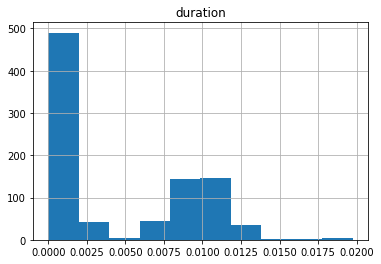

In [100]:
# Filtering duration values less or equal to 0.02
numerical_data_updated[numerical_data_updated['duration'] <= 0.02].hist(column = 'duration')

### **Central Tendency**
Central tendency metrics are values that intent to describe a whole group of values. 

One example of central tendency metric for numerical data is the mode or most frequent value. We can use the **[mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)** method to calculate it.

In [101]:
zeek_df['duration'].mode()

0    0.0
dtype: float64

Another central tendency metric that we could use with numerical data is the mean or average value. We can use the **[mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)** method to calculate it.

In [102]:
zeek_df['duration'].mean()

4.569903998491241

The mean or average is a good central tendency metric when the distribution of our data is not shifted to one side (Right or Left) or not skewed. If the distribution of our data is skewed, there might be extreme values (Short or Large) in our data that affect the value of our mean. A central tendency metric that is not affected by extreme values is the median. We can use the **[median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html)** method to calculate it.

In [103]:
zeek_df['duration'].median()

0.002707958221435547

### **Shape of Distribution of Frequencies**
In the previous section we mentioned that our data might contain extreme values (Short or Large) that affect the calculation of the mean or average of numerical data. These extreme values could also impact the shape of the distribution of frequencies of our data.

One metric that can help us to describe the shape of the distribution of frequencies is **Kurtosis**. This metric identifies whether the tails of a given distribution contains extreme values. A Kurtosis value greater than 3 might indicate the presence of large outliers. On the other hand, a Kurtosis value less than 3 might indicate the presence of small outliers.

We can use the **[kurtosis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurtosis.html)** method to calculate it.

In [104]:
zeek_df['duration'].kurtosis()

706.6612212729053

Another metric that can help us to describe the shape of the distribution of frequencies of our data is **Skewness**. This metric identifies if the shape of our distribution of frequencies deviates from the symmetrical bell curve, or normal distribution. In other words, it identifies if the distribution of frequencies is shifted to the right or to the left.

A **negative** value for skewness indicates that our distribution of frequencies is **left skewed** (left tail). On the other hand, a **positive** value for skewness indicates that our distribution of frequencies is **right skewed** (right tail).

We can use the **[skew](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html)** method to calculate it.

In [105]:
zeek_df['duration'].skew()

25.313750482239236

### **Variability**

After calculating central tendency and shape metrics, we identified the presence of potential extreme values. These extreme values are different from most of our data values. This means that there exists variability among our data values.

Let's start by visually describing the variability of our data using a **box plot**. We can use the **[boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)** method to graph one.

count    1025.000000
mean        4.569904
std        65.376324
min         0.000000
25%         0.000000
50%         0.002708
75%         0.010263
max      1901.216208
Name: duration, dtype: float64


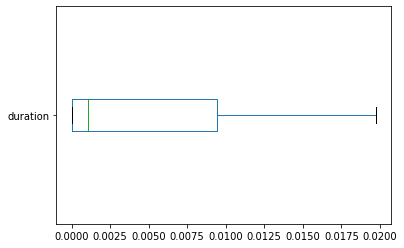

In [106]:
# Filtering duration values less or equal to 0.02
numerical_data_updated[numerical_data_updated['duration'] <= 0.02].boxplot(column = 'duration', vert = False, grid = False)
print(numerical_data_updated['duration'].describe())

A very basic metric that we can use to describe the variability in our data is the **Range** of values, which is the difference between the maximum and minimum value. We can use the **[min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html)** and **[max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html)** methods to calculate the range.

In [107]:
range = zeek_df['duration'].max() - zeek_df['duration'].min()
range

1901.2162079811096

Another metric that we can use is the **Interquartile Range (IQR)** of values, which measures the variability or spread of the middle half of our data. We calculate it by subtracting  the first quartile (25%) from the third quartile (75%). We can use the **[quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)** method to calculate the first and third quartile of our data.

In [108]:
iqr = zeek_df['duration'].quantile(q = 0.75) - zeek_df['duration'].quantile(q = 0.25)
iqr

0.01026296615600586

The last variability metric that we would like to share with you is **Standard Deviation**. This value gives us an idea of, on average, how far are our values from the mean. We can use the **[std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)** method to calculate the standard deviation of our data.

In [109]:
std_dev = zeek_df['duration'].std()
std_dev

65.37632416317761

### **Correlation**
To graphically understand the relationship between 2 numerical variables, we can use a **scatter plot**. we can use the **[plot.scatter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)** method to create a scatter plot.

<AxesSubplot:xlabel='orig_bytes', ylabel='resp_bytes'>

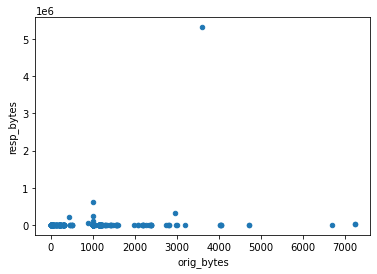

In [110]:
# Filtering orig_bytes < 10000
zeek_df[zeek_df['orig_bytes'] < 10000].plot.scatter(x = 'orig_bytes', y = 'resp_bytes')

Pandas also provies us with the **[corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)** method to calculate correlation coeficients (Default method: Pearson coefficient - Linear Relation). We can correlate 2 or more numerical variables.

In [111]:
numerical_data_updated.corr()

,duration,orig_bytes,orig_pkts,resp_bytes,resp_pkts
duration,1.000000,0.088359,0.935223,0.903869,0.930104
orig_bytes,0.088359,1.000000,0.148155,0.075493,0.099968
orig_pkts,0.935223,0.148155,1.000000,0.980667,0.997377
resp_bytes,0.903869,0.075493,0.980667,1.000000,0.988010
resp_pkts,0.930104,0.099968,0.997377,0.988010,1.000000


---
# End of Session
# <font color=peru>Break: 5 Minutes</font>

![](../media/dog-leash-break.jpg)